In [1]:
import numpy as np
import pandas as pd


# 1. Define Problem Statement and Formatting the Data (20 points)

In [2]:
df1 = pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
df2 = pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
df3 = pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')

In [3]:
df1.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [4]:
df2.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [5]:
df3.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


### Problem: 
Our columns are '::' seperated and we need to seperate them using str function and create seperate features.

step 1 : df1

In [6]:
# Split the 'Movie ID::Title::Genres' column into separate columns
df1[['Movie ID', 'Title', 'Genres']] = df1['Movie ID::Title::Genres'].str.split('::', expand=True)

# Drop the original combined column and any unnamed columns
df1 = df1.drop(columns=['Movie ID::Title::Genres'])
df1.head()

,Unnamed: 1,Unnamed: 2,Movie ID,Title,Genres
0,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy
1,NaN,NaN,2,Jumanji (1995),Adventure|Children's|Fantasy
2,NaN,NaN,3,Grumpier Old Men (1995),Comedy|Romance
3,NaN,NaN,4,Waiting to Exhale (1995),Comedy|Drama
4,NaN,NaN,5,Father of the Bride Part II (1995),Comedy


step 2 : df2

In [7]:
# Split the 'Movie ID::Title::Genres' column into separate columns
df2[['UserID', 'MovieID', 'Rating','Timestamp']] = df2['UserID::MovieID::Rating::Timestamp'].str.split('::', expand=True)

# Drop the original combined column and any unnamed columns
df2 = df2.drop(columns=['UserID::MovieID::Rating::Timestamp'])
df2.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


step 3 : df3

In [8]:
# Split the 'Movie ID::Title::Genres' column into separate columns
df3[['UserID', 'Gender', 'Age','Occupation','Zip-code']] = df3['UserID::Gender::Age::Occupation::Zip-code'].str.split('::', expand=True)

# Drop the original combined column and any unnamed columns
df3 = df3.drop(columns=['UserID::Gender::Age::Occupation::Zip-code'])
df3.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Observation: 
We have formatted our data very well by using 'str.split' function and now we can proceed further

Note: Finding the common columns in all three dataframes using the intersection function. This is needed so that we can merge our dataframes into single dataframes.

Important: Logic for merging the dataframes - 
1. movies + ratings = we are merging based upon the 'Movie ID', Let's say its df4.
2. df4 + users = we are merging them based upon the 'User ID', We will call this dataframe as df.

In [9]:
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 1', 'Unnamed: 2', 'Movie ID', 'Title', 'Genres'], dtype='object')
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')


In [10]:
# renaming the Movie ID  as MovieID in df1
df1 = df1.rename(columns = {'Movie ID' : 'MovieID'})

In [11]:
df1.shape

(3883, 5)

In [12]:
df2.shape

(1000209, 4)

In [13]:
merged_df = pd.merge(df1, df2, on='MovieID', how='inner')

In [14]:
merged_df.shape

(1000209, 8)

In [15]:
merged_df.head()

,Unnamed: 1,Unnamed: 2,MovieID,Title,Genres,UserID,Rating,Timestamp
0,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


Note: Merging the 'merged_df' and df3 based on the 'UserID' 

In [16]:
df3.shape

(6040, 5)

In [17]:
df = pd.merge(merged_df, df3, on='UserID', how='inner')

In [18]:
df.tail()

,Unnamed: 1,Unnamed: 2,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
1000204,NaN,NaN,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099,F,25,7,92120
1000205,NaN,NaN,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125,M,25,1,92120
1000206,NaN,NaN,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656,M,25,7,60607
1000207,NaN,NaN,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537,M,35,14,10003
1000208,NaN,NaN,3952,"Contender, The (2000)",Drama|Thriller,5998,4,1001781044,M,18,4,61820


In [19]:
df.shape

(1000209, 12)

In [20]:
df.drop(columns = ['Unnamed: 1','Unnamed: 2'],axis = 1, inplace = True)

In [21]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [22]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

### Problem : 
We have duplicated columns, we need to check whether these columns are duplicated or not, if they are dupplicated columns then we need to drop one of it and keep unique one only.

In [23]:
# Function to drop duplicated columns
def drop_duplicate_columns(df):
    columns_to_drop = []
    for col in df.columns:
        if col.endswith('_y') and col[:-2] + '_x' in df.columns:
            columns_to_drop.append(col)
    df.drop(columns_to_drop, axis=1, inplace=True)


In [24]:
drop_duplicate_columns(df)

In [25]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [26]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [27]:
# Remove '_x' suffix from column names
df.columns = df.columns.str.rstrip('_x')

In [28]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [29]:
df.shape

(1000209, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


In [31]:
df.describe()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
count,1000209,1000209,996144,1000209,1000209,1000209,1000209,1000209,1000209,1000209
unique,3706,3706,358,6040,5,458455,2,7,21,3439
top,2858,American Beauty (1999),Comedy,4169,4,975528402,M,25,4,94110
freq,3428,3428,116691,2314,348971,30,753769,395556,131032,3802


In [32]:
df.isnull().sum()

MovieID          0
Title            0
Genres        4065
UserID           0
Rating           0
Timestamp        0
Gender           0
Age              0
Occupation       0
Zip-code         0
dtype: int64

### Observation:
We have 4k null values in Genres, we will drop these rows

In [33]:
df = df.dropna(subset = ['Genres'])

In [34]:
df.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [35]:
df.shape

(996144, 10)

### Key observations:
We have successfully formatted the data and created the single dataframe ie. df.

## ------------------------------------------------------------------------------------------

# 2. Performing EDA, Data Cleaning, and Feature Engineering.

In [36]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [37]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [38]:
df['Genres'].value_counts().count()
# we have total 358 categories here

358

In [39]:
df.shape

(996144, 10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996144 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     996144 non-null  object
 1   Title       996144 non-null  object
 2   Genres      996144 non-null  object
 3   UserID      996144 non-null  object
 4   Rating      996144 non-null  object
 5   Timestamp   996144 non-null  object
 6   Gender      996144 non-null  object
 7   Age         996144 non-null  object
 8   Occupation  996144 non-null  object
 9   Zip-code    996144 non-null  object
dtypes: object(10)
memory usage: 83.6+ MB


In [41]:
df.describe()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
count,996144,996144,996144,996144,996144,996144,996144,996144,996144,996144
unique,3682,3682,358,6040,5,457632,2,7,21,3439
top,2858,American Beauty (1999),Comedy,4169,4,975528402,M,25,4,94110
freq,3428,3428,116691,2303,347758,30,750590,394105,130626,3782


In [42]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [98]:

# Convert columns to their respective data types
df['MovieID'] = df['MovieID'].astype(int)
df['UserID'] = df['UserID'].astype(int)
df['Rating'] = df['Rating'].astype(int)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming Unix timestamp in seconds
df['Age'] = df['Age'].astype(int)
df['Occupation'] = df['Occupation'].astype(int)


In [44]:
# Calculate average rating per unique genre string and number of ratings
genre_stats = df.groupby('Genres').agg({'Rating': ['mean', 'size']})
genre_stats.columns = ['AvgRating', 'NumRatings']

# Round average rating to 2 decimals
genre_stats['AvgRating'] = genre_stats['AvgRating'].round(2)

# Merge genre statistics back into original DataFrame 'df'
df = df.merge(genre_stats, on='Genres', how='left')



In [45]:
df['AvgRating'] = df['AvgRating'].astype(float)
df['NumRatings'] = df['NumRatings'].astype(int)

### Observation : 
We have created the two new features.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996144 entries, 0 to 996143
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     996144 non-null  int32         
 1   Title       996144 non-null  object        
 2   Genres      996144 non-null  object        
 3   UserID      996144 non-null  int32         
 4   Rating      996144 non-null  int32         
 5   Timestamp   996144 non-null  datetime64[ns]
 6   Gender      996144 non-null  object        
 7   Age         996144 non-null  int32         
 8   Occupation  996144 non-null  int32         
 9   Zip-code    996144 non-null  object        
 10  AvgRating   996144 non-null  float64       
 11  NumRatings  996144 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(6), object(4)
memory usage: 68.4+ MB


In [47]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month


In [48]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,AvgRating,NumRatings,Year,Month
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:36,F,1,10,48067,3.98,7254,2001,1
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:29:52,F,50,9,55117,3.98,7254,2000,12
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:12,M,25,12,11413,3.98,7254,2000,12
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,2000-12-31 01:25:20,M,25,17,61614,3.98,7254,2000,12
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,2000-12-31 01:34:56,F,35,1,95370,3.98,7254,2000,12


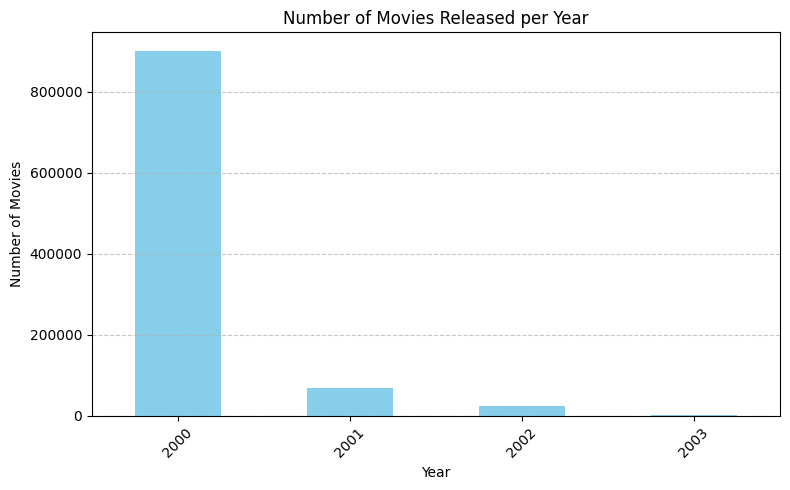

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Year' and count the number of movies released per year
movies_per_year = df.groupby('Year').size()

# Plotting the graph
plt.figure(figsize=(8, 5))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


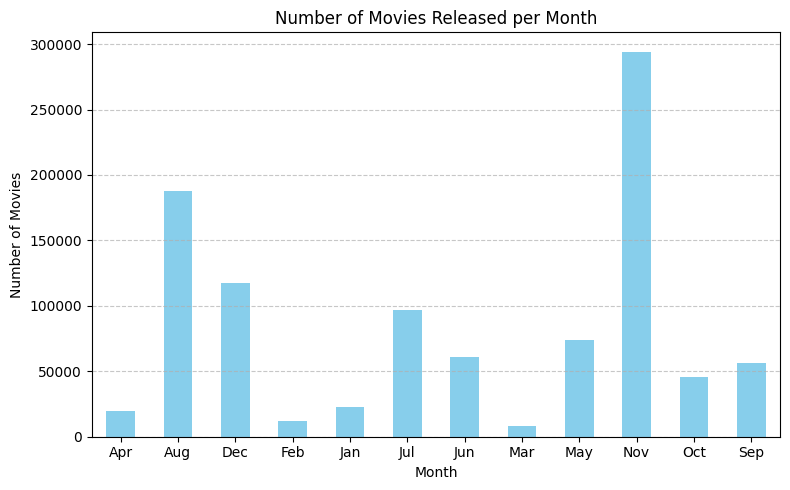

In [50]:
# Mapping month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Rename 'Month' column with month names
df['Month'] = df['Month'].map(month_names)

# Group by 'Month' and count the number of movies released per month
movies_per_month = df.groupby('Month').size()

# Plotting the graph
plt.figure(figsize=(8, 5))
movies_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

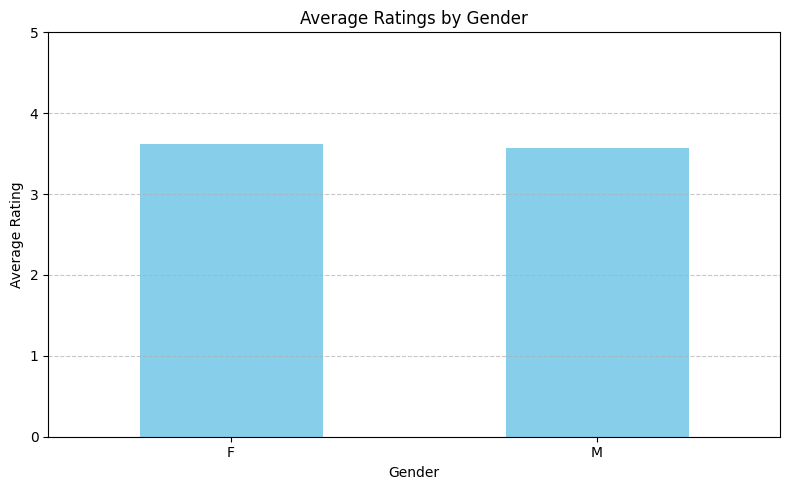

In [51]:
# Group by 'Gender' and calculate average rating
gender_avg_rating = df.groupby('Gender')['Rating'].mean().sort_values(ascending=False)

# Plotting the graph
plt.figure(figsize=(8, 5))
gender_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.ylim(0, 5)  # Setting y-axis limit from 0 to 5 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
df['Age'].value_counts()

Age
25    394105
35    198084
18    183047
45     83161
50     72071
56     38544
1      27132
Name: count, dtype: int64

In [53]:
df['Age'].value_counts()

Age
25    394105
35    198084
18    183047
45     83161
50     72071
56     38544
1      27132
Name: count, dtype: int64

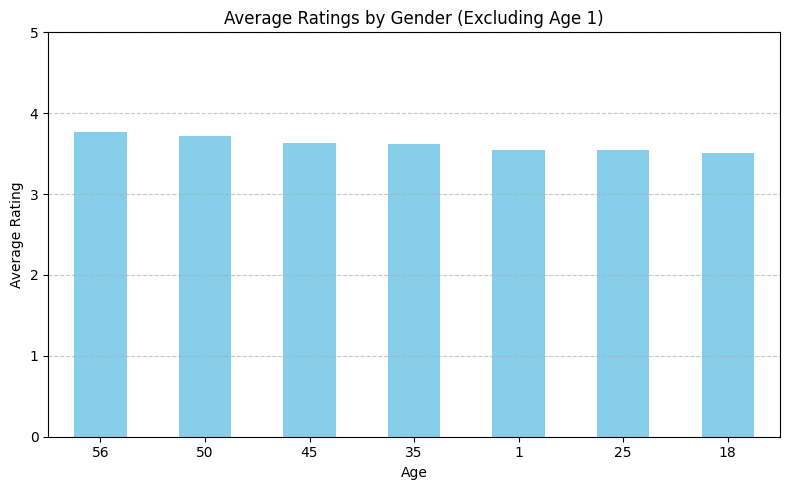

In [54]:
# Group by 'Gender' and calculate average rating
gender_avg_rating = df.groupby('Age')['Rating'].mean().sort_values(ascending=False)

# Plotting the graph
plt.figure(figsize=(8, 5))
gender_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Gender (Excluding Age 1)')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.ylim(0, 5)  # Setting y-axis limit from 0 to 5 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

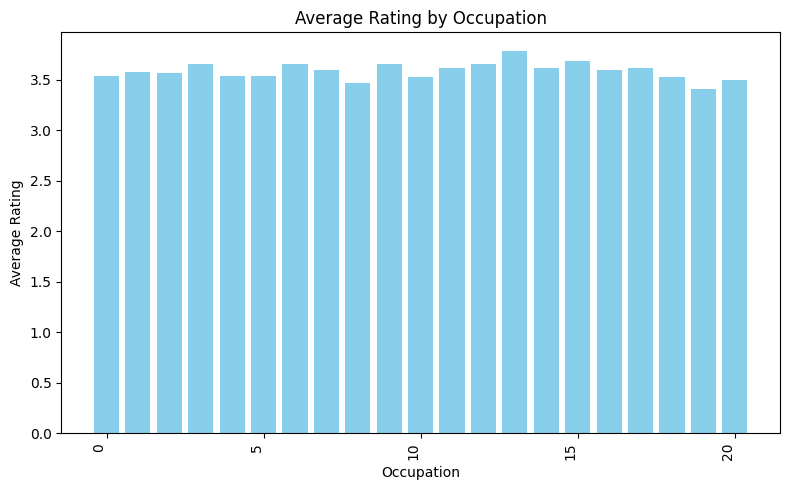

In [55]:
# Group by 'Occupation' and calculate average rating
avg_ratings = df.groupby('Occupation')['Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.bar(avg_ratings['Occupation'], avg_ratings['Rating'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.title('Average Rating by Occupation')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [56]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,AvgRating,NumRatings,Year,Month
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:36,F,1,10,48067,3.98,7254,2001,Jan
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:29:52,F,50,9,55117,3.98,7254,2000,Dec
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:12,M,25,12,11413,3.98,7254,2000,Dec
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,2000-12-31 01:25:20,M,25,17,61614,3.98,7254,2000,Dec
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,2000-12-31 01:34:56,F,35,1,95370,3.98,7254,2000,Dec


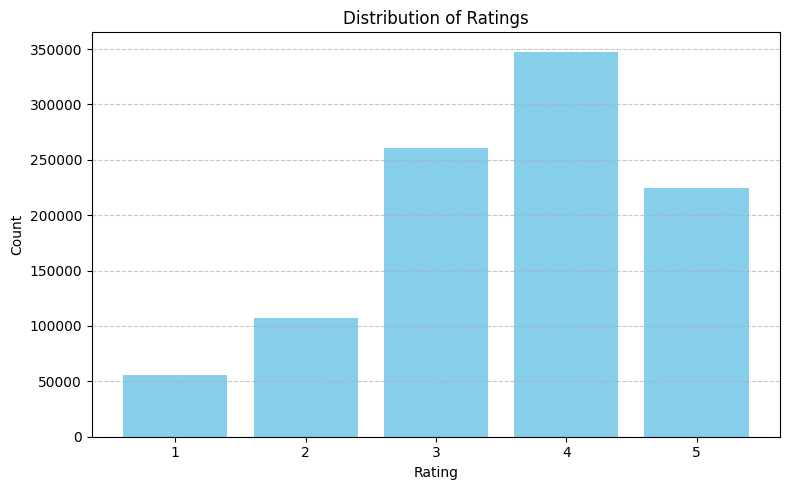

In [57]:
# Count occurrences of each rating
rating_counts = df['Rating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,AvgRating,NumRatings,Year,Month
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:36,F,1,10,48067,3.98,7254,2001,Jan
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:29:52,F,50,9,55117,3.98,7254,2000,Dec
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:12,M,25,12,11413,3.98,7254,2000,Dec
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,2000-12-31 01:25:20,M,25,17,61614,3.98,7254,2000,Dec
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,2000-12-31 01:34:56,F,35,1,95370,3.98,7254,2000,Dec


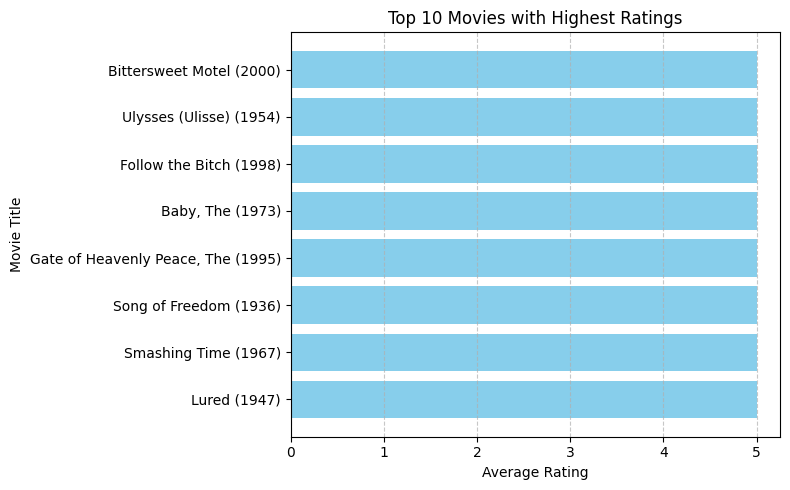

In [59]:
# Calculate average rating for each movie
avg_ratings = df.groupby('MovieID')['Rating'].mean().reset_index()

# Merge with 'Title' to get movie titles
avg_ratings = avg_ratings.merge(df[['MovieID', 'Title']], on='MovieID', how='left')

# Sort by average rating in descending order and get top 10
top_10_movies = avg_ratings.sort_values(by='Rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(top_10_movies['Title'], top_10_movies['Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996144 entries, 0 to 996143
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MovieID     996144 non-null  int32         
 1   Title       996144 non-null  object        
 2   Genres      996144 non-null  object        
 3   UserID      996144 non-null  int32         
 4   Rating      996144 non-null  int32         
 5   Timestamp   996144 non-null  datetime64[ns]
 6   Gender      996144 non-null  object        
 7   Age         996144 non-null  int32         
 8   Occupation  996144 non-null  int32         
 9   Zip-code    996144 non-null  object        
 10  AvgRating   996144 non-null  float64       
 11  NumRatings  996144 non-null  int32         
 12  Year        996144 non-null  int32         
 13  Month       996144 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(7), object(5)
memory usage: 79.8+ MB


# 3. Build a Recommender System based on Pearson Correlation

In [61]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'AvgRating', 'NumRatings', 'Year',
       'Month'],
      dtype='object')

#### 3.1 Creating a pivot table of movie titles & user id and imputing the NaN values

In [62]:
user_item_matrix = df.pivot_table(index='UserID', columns='Title', values='Rating')
user_item_matrix.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
user_item_matrix = user_item_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)
user_item_matrix.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
2,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
3,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
4,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
5,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098


In [64]:
# Calculate Pearson correlation between movies
item_similarity = user_item_matrix.corr(method='pearson')
item_similarity.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.005426,0.000218,0.000237,0.011534,4.133058e-15,-0.035030,0.106339,0.026127,-0.026918,...,0.008211,-0.013066,8.740249e-16,-0.008771,5.729771e-16,-0.016180,0.002219,-2.309585e-15,1.242279e-02,-0.011893
'Night Mother (1986),0.005426,1.000000,-0.027920,0.016997,0.043916,-1.287556e-15,0.017359,0.033991,-0.010504,0.023962,...,0.045371,-0.013403,-1.637718e-04,-0.009447,-8.191163e-16,-0.085133,0.005007,3.669793e-15,-1.211629e-15,0.002673
'Til There Was You (1997),0.000218,-0.027920,1.000000,0.106643,0.039437,-6.719412e-02,0.037274,0.070025,0.071656,0.028098,...,-0.002787,0.001950,-8.543742e-16,0.002469,-2.473120e-16,-0.003137,0.019337,4.672566e-15,1.324870e-02,0.017444
"'burbs, The (1989)",0.000237,0.016997,0.106643,1.000000,0.006962,-6.384217e-15,0.046215,0.026934,0.027559,0.010346,...,0.048543,0.052684,-4.519952e-03,0.024466,-1.629053e-15,0.001550,0.009262,9.016159e-15,-1.718682e-02,0.020929
...And Justice for All (1979),0.011534,0.043916,0.039437,0.006962,1.000000,-3.120009e-15,0.020514,0.032768,-0.017430,0.064177,...,-0.026911,0.010570,7.538153e-02,0.014089,-5.399955e-17,-0.074584,0.024968,7.361906e-02,3.150148e-16,-0.003858


In [65]:
def get_movie_recommendations(user_id, user_item_matrix, item_similarity, num_recommendations=5):
    # Get movies rated by the user
    user_ratings = user_item_matrix.loc[user_id].dropna()
    
    if user_ratings.empty:
        return pd.Series()
    
    # Initialize a list to store recommendations
    recommendations_list = []
    
    # Iterate over movies rated by the user
    for movie, rating in user_ratings.items():
        # Get similar movies and their similarity scores
        if movie in item_similarity.index:
            similar_movies = item_similarity[movie].dropna()
            # Scale similarity by the user's rating
            similar_movies = similar_movies * rating
            # Append to recommendations list
            recommendations_list.append(similar_movies)
    
    # Concatenate all recommendation Series into one
    if recommendations_list:
        recommendations = pd.concat(recommendations_list)
    else:
        return pd.Series()
    
    # Group by movie titles and calculate the mean similarity score
    recommendations = recommendations.groupby(recommendations.index).mean()
    
    # Remove movies already rated by the user
    recommendations = recommendations.drop(user_ratings.index, errors='ignore')
    
    # Convert recommendations to numeric type if not already
    recommendations = pd.to_numeric(recommendations, errors='coerce')
    
    # Get top recommendations
    top_recommendations = recommendations.nlargest(num_recommendations)
    
    return top_recommendations.index

In [66]:
user_id = 1
recommendations = get_movie_recommendations(user_id, user_item_matrix, item_similarity, num_recommendations=5)

In [67]:
recommendations

Index([], dtype='object', name='Title')

In [68]:
print(item_similarity.shape)
print(user_item_matrix.shape)

(3682, 3682)
(6040, 3682)


In [69]:
print(user_item_matrix.shape)

(6040, 3682)


In [70]:

# Normalize movie titles in the DataFrame
df['Title'] = df['Title'].apply(lambda x: x.lower().strip())

# Create pivot table
user_item_matrix = df.pivot_table(index='UserID', columns='Title', values='Rating')

# Fill NaN values with the mean rating of each movie
user_item_matrix = user_item_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

print("User-Item Matrix:")
print(user_item_matrix)

# Calculate Pearson correlation between movies
item_similarity = user_item_matrix.corr(method='pearson')




User-Item Matrix:
Title   $1,000,000 duck (1971)  'burbs, the (1989)  'night mother (1986)  \
UserID                                                                     
1                     3.027027            2.910891              3.371429   
2                     3.027027            2.910891              3.371429   
3                     3.027027            2.910891              3.371429   
4                     3.027027            2.910891              3.371429   
5                     3.027027            2.910891              3.371429   
...                        ...                 ...                   ...   
6036                  3.027027            2.910891              3.000000   
6037                  3.027027            2.910891              3.371429   
6038                  3.027027            2.910891              3.371429   
6039                  3.027027            2.910891              3.371429   
6040                  3.027027            2.910891              3.3714

In [71]:
item_similarity.head()

Title,"$1,000,000 duck (1971)","'burbs, the (1989)",'night mother (1986),'til there was you (1997),...and justice for all (1979),1-900 (1994),10 things i hate about you (1999),101 dalmatians (1961),101 dalmatians (1996),12 angry men (1957),...,young guns (1988),young guns ii (1990),"young poisoner's handbook, the (1995)",young sherlock holmes (1985),your friends and neighbors (1998),zachariah (1971),"zed & two noughts, a (1985)",zero effect (1998),zero kelvin (kjærlighetens kjøtere) (1995),zeus and roxanne (1997)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 duck (1971)",1.000000,0.000237,0.005426,0.000218,0.011534,4.133058e-15,-0.035030,0.106339,0.026127,-0.026918,...,0.020704,-0.014301,0.008211,-0.013066,-0.008771,5.729771e-16,-0.016180,0.002219,-2.309585e-15,1.242279e-02
"'burbs, the (1989)",0.000237,1.000000,0.016997,0.106643,0.006962,-6.384217e-15,0.046215,0.026934,0.027559,0.010346,...,0.117244,0.110766,0.048543,0.052684,0.024466,-1.629053e-15,0.001550,0.009262,9.016159e-15,-1.718682e-02
'night mother (1986),0.005426,0.016997,1.000000,-0.027920,0.043916,-1.287556e-15,0.017359,0.033991,-0.010504,0.023962,...,0.010299,-0.001052,0.045371,-0.013403,-0.009447,-8.191163e-16,-0.085133,0.005007,3.669793e-15,-1.211629e-15
'til there was you (1997),0.000218,0.106643,-0.027920,1.000000,0.039437,-6.719412e-02,0.037274,0.070025,0.071656,0.028098,...,-0.001983,0.004290,-0.002787,0.001950,0.002469,-2.473120e-16,-0.003137,0.019337,4.672566e-15,1.324870e-02
...and justice for all (1979),0.011534,0.006962,0.043916,0.039437,1.000000,-3.120009e-15,0.020514,0.032768,-0.017430,0.064177,...,-0.003907,0.012353,-0.026911,0.010570,0.014089,-5.399955e-17,-0.074584,0.024968,7.361906e-02,3.150148e-16


In [72]:
import pandas as pd
from prettytable import PrettyTable

# Function to find the highest rated movie by a user
def get_highest_rated_movie(user_id, user_item_matrix):
    # Get user's ratings
    user_ratings = user_item_matrix.loc[user_id].dropna()
    
    if user_ratings.empty:
        print(f"User ID {user_id} has no ratings.")
        return None, None
    
    # Find the highest rated movie
    highest_rated_movie = user_ratings.idxmax()
    highest_rating = user_ratings.max()
    
    return highest_rated_movie, highest_rating

# Function to get top similar movies based on item similarity matrix
def get_top_similar_movies(movie_title, item_similarity_matrix, num_recommendations=5):
    # Check if the movie exists in the item similarity matrix
    if movie_title not in item_similarity_matrix.index:
        print(f"Movie '{movie_title}' not found in item similarity matrix. Returning empty recommendations.")
        return pd.Series(dtype=float)
    
    # Get similar movies from the similarity matrix
    similar_movies = item_similarity_matrix[movie_title].dropna()
    similar_movies = similar_movies[similar_movies.index != movie_title]  # Exclude the movie itself
    
    # Get top recommendations
    top_recommendations = similar_movies.nlargest(num_recommendations)
    
    return top_recommendations

# Function to format output in a pretty table
def format_movie_recommendations(user_id, highest_rated_movie, highest_rating, top_recommendations):
    table = PrettyTable(['User ID', 'Highest Rated Movie', 'Rating'])
    table.add_row([user_id, highest_rated_movie, highest_rating])
    
    print("\nHighest rated movie by User {}:".format(user_id))
    print(table)
    
    if not top_recommendations.empty:
        table = PrettyTable(['Rank', 'Movie Title', 'Similarity Score'])
        for rank, movie_title in enumerate(top_recommendations.index, start=1):
            similarity_score = top_recommendations[movie_title]
            table.add_row([rank, movie_title, similarity_score])
        
        print("\nTop {} Recommendations for '{}':".format(len(top_recommendations), highest_rated_movie))
        print(table)
    else:
        print("\nNo recommendations found for '{}'.".format(highest_rated_movie))

# Example usage
user_id = int(input("Enter the User ID: "))  # Input the user ID
highest_rated_movie, highest_rating = get_highest_rated_movie(user_id, user_item_matrix)

if highest_rated_movie:
    num_recommendations = 5
    top_recommendations = get_top_similar_movies(highest_rated_movie, item_similarity, num_recommendations)
    
    format_movie_recommendations(user_id, highest_rated_movie, highest_rating, top_recommendations)


Enter the User ID:  1



Highest rated movie by User 1:
+---------+---------------------+--------+
| User ID | Highest Rated Movie | Rating |
+---------+---------------------+--------+
|    1    |   apollo 13 (1995)  |  5.0   |
+---------+---------------------+--------+

Top 5 Recommendations for 'apollo 13 (1995)':
+------+----------------------------------+---------------------+
| Rank |           Movie Title            |   Similarity Score  |
+------+----------------------------------+---------------------+
|  1   |      few good men, a (1992)      | 0.19890173303458406 |
|  2   |          ransom (1996)           | 0.17124401848555829 |
|  3   |  league of their own, a (1992)   |  0.1653735814337228 |
|  4   |    mr. holland's opus (1995)     | 0.16027273364268174 |
|  5   | hunt for red october, the (1990) |  0.1545588682345758 |
+------+----------------------------------+---------------------+


### Observation and how logic works: 

1. We are building the item item similarity rec. system.
2. We are finding out the highest rated movie(item) for the user, after getting that highest rated item, we are finding similar items and selecting the most similar items and that is our recommendation for that input user.
3. It is very simple and powerful model and using pearson correlation internally.
   

In [99]:
import pandas as pd

# Assume user_item_matrix and item_similarity are your matrices
user_item_matrix.to_csv('user_item_matrix.csv')
item_similarity.to_csv('item_similarity.csv')


# 4. Build a Recommender System based on Cosine Similarity. 

#### 4.1 Print the user similarity matrix and item similarity matrix



In [73]:
user_item_matrix.head()

Title,"$1,000,000 duck (1971)","'burbs, the (1989)",'night mother (1986),'til there was you (1997),...and justice for all (1979),1-900 (1994),10 things i hate about you (1999),101 dalmatians (1961),101 dalmatians (1996),12 angry men (1957),...,young guns (1988),young guns ii (1990),"young poisoner's handbook, the (1995)",young sherlock holmes (1985),your friends and neighbors (1998),zachariah (1971),"zed & two noughts, a (1985)",zero effect (1998),zero kelvin (kjærlighetens kjøtere) (1995),zeus and roxanne (1997)
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.027027,2.910891,3.371429,2.692308,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.418149,2.907859,3.632911,3.390501,3.376147,3.5,3.413793,3.750831,3.5,2.521739
2,3.027027,2.910891,3.371429,2.692308,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.418149,2.907859,3.632911,3.390501,3.376147,3.5,3.413793,3.750831,3.5,2.521739
3,3.027027,2.910891,3.371429,2.692308,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,5.000000,4.000000,3.632911,3.390501,3.376147,3.5,3.413793,3.750831,3.5,2.521739
4,3.027027,2.910891,3.371429,2.692308,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.418149,2.907859,3.632911,3.390501,3.376147,3.5,3.413793,3.750831,3.5,2.521739
5,3.027027,2.910891,3.371429,2.692308,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.418149,2.907859,3.632911,3.390501,3.376147,3.5,3.413793,3.750831,3.5,2.521739


In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
# Compute item-item similarity using cosine similarity
item_similarity_matrix_cosine = pd.DataFrame(cosine_similarity(user_item_matrix.T), 
                                      index=user_item_matrix.columns, 
                                      columns=user_item_matrix.columns)

In [76]:
item_similarity_matrix_cosine.head()

Title,"$1,000,000 duck (1971)","'burbs, the (1989)",'night mother (1986),'til there was you (1997),...and justice for all (1979),1-900 (1994),10 things i hate about you (1999),101 dalmatians (1961),101 dalmatians (1996),12 angry men (1957),...,young guns (1988),young guns ii (1990),"young poisoner's handbook, the (1995)",young sherlock holmes (1985),your friends and neighbors (1998),zachariah (1971),"zed & two noughts, a (1985)",zero effect (1998),zero kelvin (kjærlighetens kjøtere) (1995),zeus and roxanne (1997)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 duck (1971)",1.000000,0.996013,0.998989,0.999007,0.998711,0.999605,0.994714,0.996396,0.995792,0.997750,...,0.995576,0.995463,0.999315,0.997434,0.998604,0.999582,0.999382,0.997702,0.999609,0.999261
"'burbs, the (1989)",0.996013,1.000000,0.995824,0.996110,0.995512,0.996392,0.991996,0.993138,0.992734,0.994641,...,0.993222,0.993150,0.996198,0.994545,0.995498,0.996369,0.996182,0.994540,0.996396,0.996000
'night mother (1986),0.998989,0.995824,1.000000,0.998732,0.998524,0.999365,0.994631,0.996011,0.995456,0.997606,...,0.995318,0.995257,0.999108,0.997187,0.998360,0.999341,0.999088,0.997469,0.999368,0.999011
'til there was you (1997),0.999007,0.996110,0.998732,1.000000,0.998538,0.999379,0.994720,0.996136,0.995731,0.997637,...,0.995301,0.995296,0.999089,0.997245,0.998401,0.999364,0.999172,0.997523,0.999391,0.999046
...and justice for all (1979),0.998711,0.995512,0.998524,0.998538,1.000000,0.999078,0.994371,0.995741,0.995137,0.997434,...,0.994984,0.995022,0.998754,0.996962,0.998115,0.999054,0.998798,0.997238,0.999090,0.998724


In [100]:
item_similarity_matrix_cosine.to_csv('item_similarity_matrix_cosine.csv')

#### 4.2 Use the Item-based approach to create a recommender system that uses Nearest Neighbors algorithm and Cosine Similarity

In [77]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Example usage:
user_id = int(input("Enter the User ID: "))  # Input the user ID

highest_rated_movie, highest_rating = get_highest_rated_movie(user_id, user_item_matrix) # here we are using the above fn we created in 3.2


if highest_rated_movie:
    num_recommendations = 5
    top_recommendations = get_top_similar_movies(highest_rated_movie, item_similarity_matrix_cosine, num_recommendations)
    
    format_movie_recommendations(user_id, highest_rated_movie, highest_rating, top_recommendations)


Enter the User ID:  1



Highest rated movie by User 1:
+---------+---------------------+--------+
| User ID | Highest Rated Movie | Rating |
+---------+---------------------+--------+
|    1    |   apollo 13 (1995)  |  5.0   |
+---------+---------------------+--------+

Top 5 Recommendations for 'apollo 13 (1995)':
+------+--------------------------+--------------------+
| Rank |       Movie Title        |  Similarity Score  |
+------+--------------------------+--------------------+
|  1   |   small wonders (1996)   | 0.9960406406570791 |
|  2   | arguing the world (1996) | 0.9960354213843234 |
|  3   |  big combo, the (1955)   | 0.996031099553575  |
|  4   |    sunset park (1996)    | 0.9960303202597561 |
|  5   |     dadetown (1995)      | 0.9960293947307406 |
+------+--------------------------+--------------------+


### Observation and logic:

1. We are using the above fn we created in part 3.
2. We can observe that the results from the Pearson correlation and cosine similary(knn) are different.

# 5. Build a Recommender System based on Matrix Factorization. 

#### 5.1 Create a Recommender System using the Matrix Factorization method

In [78]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,AvgRating,NumRatings,Year,Month
0,1,toy story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:36,F,1,10,48067,3.98,7254,2001,Jan
1,1,toy story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:29:52,F,50,9,55117,3.98,7254,2000,Dec
2,1,toy story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:12,M,25,12,11413,3.98,7254,2000,Dec
3,1,toy story (1995),Animation|Children's|Comedy,9,5,2000-12-31 01:25:20,M,25,17,61614,3.98,7254,2000,Dec
4,1,toy story (1995),Animation|Children's|Comedy,10,5,2000-12-31 01:34:56,F,35,1,95370,3.98,7254,2000,Dec


In [79]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse
import numpy as np

# Assuming your dataframe is named df and has columns 'UserID', 'MovieID', 'Rating'
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['UserID', 'MovieID', 'Rating']], reader)


In [80]:

# Split the data into train and test set
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD (Singular Value Decomposition)
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)



#### 5.2 Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error

In [81]:
# Calculate RMSE
print("RMSE: ", rmse(predictions))

# Calculate MAPE manually
def mape(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return np.mean(np.abs((actual - predicted) / actual)) * 100

print("MAPE: ", mape(predictions))


RMSE: 0.8808
RMSE:  0.8807538522022935
MAPE:  26.66581597014006


In [103]:
# Save the model
joblib.dump(algo, 'recommender_model.joblib')

# Save RMSE and MAPE to a CSV file
metrics = pd.DataFrame({'RMSE': [rmse_value], 'MAPE': [mape_value]})
metrics.to_csv('model_metrics.csv', index=False)

NameError: name 'rmse_value' is not defined

#### 5.3 Use embeddings for visualization and similarity-based models

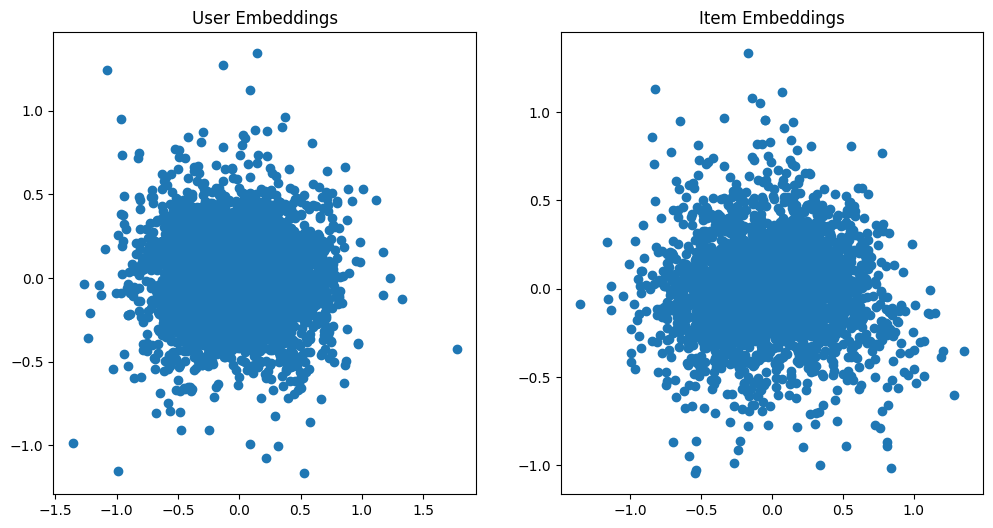

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract user and item embeddings
user_embeddings = algo.pu
item_embeddings = algo.qi

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_user_embeddings = pca.fit_transform(user_embeddings)
reduced_item_embeddings = pca.fit_transform(item_embeddings)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(reduced_user_embeddings[:, 0], reduced_user_embeddings[:, 1])
plt.title('User Embeddings')
plt.subplot(1, 2, 2)
plt.scatter(reduced_item_embeddings[:, 0], reduced_item_embeddings[:, 1])
plt.title('Item Embeddings')
plt.show()

#### Performing some recommendations

In [85]:
# Function to recommend top N movies for a given user
def recommend_top_n_movies(algo, user_id, df, n=5):
    # Get the list of all movie IDs
    all_movie_ids = df['MovieID'].unique()
    
    # Get the list of movie IDs the user has already rated
    rated_movie_ids = df[df['UserID'] == user_id]['MovieID'].unique()
    
    # Get the list of movie IDs the user hasn't rated yet
    unrated_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for the unrated movies
    predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_movie_ids]
    
    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get the top N movie IDs
    top_n_movie_ids = [pred.iid for pred in predictions[:n]]
    
    # Get the movie titles
    top_n_movies = df[df['MovieID'].isin(top_n_movie_ids)]['Title'].unique()
    
    return top_n_movies

# Example usage
user_id = int(input("Enter the User ID: "))  # Input the user ID
top_n_movies = recommend_top_n_movies(algo, user_id, df, n=5)

print(f"\nTop 5 Recommendations for User {user_id}:")
print(top_n_movies)

Enter the User ID:  1



Top 5 Recommendations for User 1:
['shawshank redemption, the (1994)'
 'world of apu, the (apur sansar) (1959)' 'terminator, the (1984)'
 'glory (1989)' 'sanjuro (1962)']


# Questionnaire:

#### 1. Users of which age group have watched and rated the most number of movies?

In [86]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'AvgRating', 'NumRatings', 'Year',
       'Month'],
      dtype='object')

In [87]:
# Step 1: Group the data by 'Age' and count the number of ratings
age_group_ratings = df.groupby('Age')['Rating'].count().reset_index()

# Step 2: Rename columns for better understanding
age_group_ratings.columns = ['Age', 'NumRatings']

# Step 3: Find the age group with the highest count of ratings
most_active_age_group = age_group_ratings.loc[age_group_ratings['NumRatings'].idxmax()]
most_active_age_group

Age               25
NumRatings    394105
Name: 2, dtype: int64

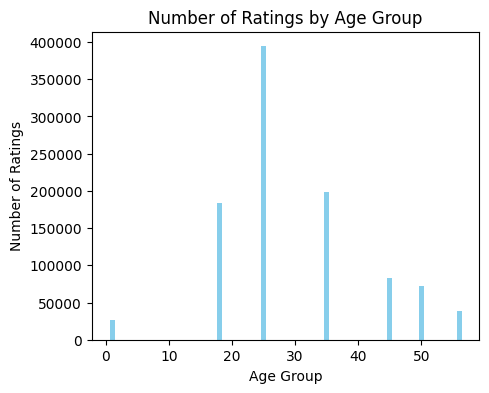

In [88]:
 # Plot the distribution of ratings across age groups
plt.figure(figsize=(5, 4))
plt.bar(age_group_ratings['Age'], age_group_ratings['NumRatings'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Age Group')
plt.show()

#### 2. Users belonging to which profession have watched and rated the most movies?

In [89]:
# Step 1: Group the data by 'Occupation' and count the number of ratings
occupation_group_ratings = df.groupby('Occupation')['Rating'].count().reset_index()

# Step 2: Rename columns for better understanding
occupation_group_ratings.columns = ['Occupation', 'NumRatings']

# Step 3: Find the occupation with the highest count of ratings
most_active_occupation_group = occupation_group_ratings.loc[occupation_group_ratings['NumRatings'].idxmax()]
most_active_occupation_group

Occupation         4
NumRatings    130626
Name: 4, dtype: int64

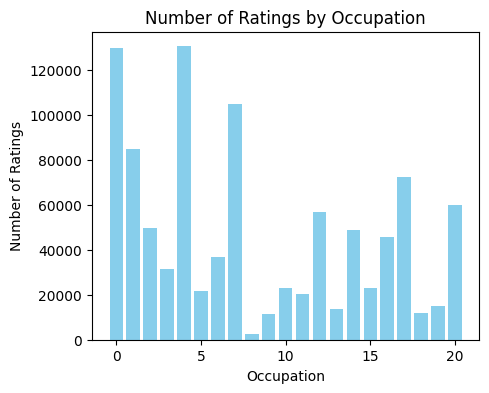

In [90]:
# Plot the distribution of ratings across occupations
plt.figure(figsize=(5, 4))
plt.bar(occupation_group_ratings['Occupation'], occupation_group_ratings['NumRatings'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Occupation')
plt.show()

#### 3.Most of the users in our dataset who’ve rated the movies are Male. (T/F)

In [91]:
 

# Step 1: Group the data by 'Gender' and count the number of ratings
gender_group_ratings = df.groupby('Gender')['Rating'].count().reset_index()

# Step 2: Rename columns for better understanding
gender_group_ratings.columns = ['Gender', 'NumRatings']

# Step 3: Find the gender with the highest count of ratings
most_rated_gender = gender_group_ratings.loc[gender_group_ratings['NumRatings'].idxmax()]

# Print the results
print(gender_group_ratings)
print(f"\nGender {most_rated_gender['Gender']} has rated the most number of movies with {most_rated_gender['NumRatings']} ratings.")

# Determine if the majority are male
is_most_male = most_rated_gender['Gender'] == 'M'

print(f"\nMost of the users in our dataset who’ve rated the movies are Male: {is_most_male}")


  Gender  NumRatings
0      F      245554
1      M      750590

Gender M has rated the most number of movies with 750590 ratings.

Most of the users in our dataset who’ve rated the movies are Male: True


#### 4. Most of the movies present in our dataset were released in which decade?

70s b. 90s c. 50s d.80s

In [92]:
df.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'AvgRating', 'NumRatings', 'Year',
       'Month'],
      dtype='object')

In [93]:
# Determine the decade
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and count the number of movies
movies_per_decade = df['Decade'].value_counts().sort_index()

# Determine the decade with the most movies
most_movies_decade = movies_per_decade.idxmax()
most_movies_count = movies_per_decade.max()

# Display the results
print(f"The decade with the most movies is the {most_movies_decade}s with {most_movies_count} movies.")

# For the options given (70s, 90s, 50s, 80s), you can also check explicitly:
decade_options = [1950, 1970, 1980, 1990]
for decade in decade_options:
    if decade in movies_per_decade.index:
        print(f"The number of movies released in the {decade}s: {movies_per_decade[decade]}")
    else:
        print(f"No movies released in the {decade}s.")

The decade with the most movies is the 2000s with 996144 movies.
No movies released in the 1950s.
No movies released in the 1970s.
No movies released in the 1980s.
No movies released in the 1990s.


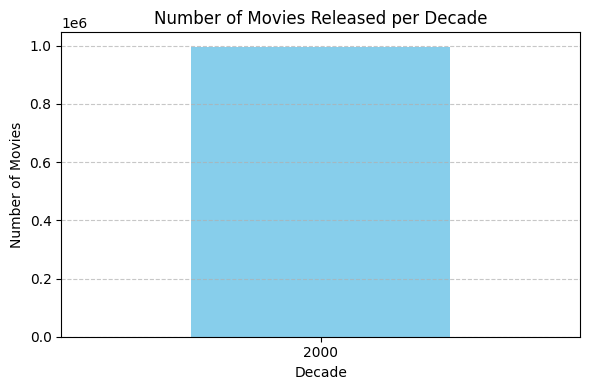

In [94]:
# Plotting the graph
plt.figure(figsize=(6, 4))
movies_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 5. The movie with maximum no. of ratings is ___.

In [95]:

# Find the movie with the maximum number of ratings
max_ratings_movie = df.loc[df['NumRatings'].idxmax()]

# Display the result
print(f"The movie with the maximum number of ratings is '{max_ratings_movie['Title']}' with {max_ratings_movie['NumRatings']} ratings.")

The movie with the maximum number of ratings is 'father of the bride part ii (1995)' with 116691 ratings.


#### 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [96]:
movie_title = 'Liar Liar'
get_top_similar_movies(movie_title, item_similarity, num_recommendations=5)

Movie 'Liar Liar' not found in item similarity matrix. Returning empty recommendations.


Series([], dtype: float64)

In [97]:
 get_top_similar_movies(movie_title, item_similarity_matrix_cosine, num_recommendations)

Movie 'Liar Liar' not found in item similarity matrix. Returning empty recommendations.


Series([], dtype: float64)

Note: The movie similar to Liar Liar is not present in the data

#### 7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.`m

1. User based filtering
2. Item based filtering

#### 8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

Pearson Correlation ranges between -1 to +1, whereas Cosine Similarity belongs to the interval between 0 to 1.

#### 9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.`m

RMSE: 0.8788
RMSE:  0.8787658776378656
MAPE:  26.641317412969816

#### 10. Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

Row=[1,0,3,7]

-------------------------------------------------------------------